In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

In [84]:
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
plt.style.use('./deeplearning.mplstyle')

Neurons without activation-Regression/Linear Model

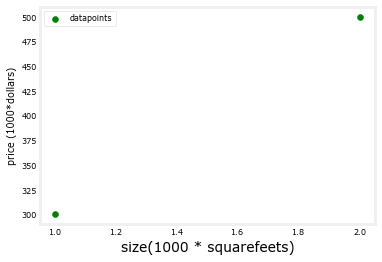

In [85]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)  
y_train = np.array([[300],[500]])
fig, ax=plt.subplots(1,1)
ax.scatter(X_train, y_train, marker='o', c='g', label='datapoints')
ax.legend()
ax.set_xlabel('size(1000 * squarefeets)', fontsize='xx-large')
ax.set_ylabel('price (1000*dollars)')

plt.show()

designe a layer with one neuron or unit and compare with familiar linear regression model

In [48]:
linear_layer = tf.keras.layers.Dense(1,activation='linear')

In [50]:
linear_layer.get_weights()

[]

there are no weights instantiated yet. we can input with X_train and weights will instantiate and input to the layer must be 2-D so will reshape it

In [57]:
a_1 = linear_layer(X_train[0].reshape(1,1))

In [79]:
print(a_1)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)


In [62]:
w, b = linear_layer.get_weights()

In [65]:
print(f'w:{w}, b:{b}')

w:[[-1.38]], b:[0.]


we will initialize the random numbers to w, b

In [71]:
set_w = np.array([[200]])
set_b = np.array([100])

#set the weights in layer
linear_layer.set_weights([set_w, set_b])
linear_layer.get_weights

<bound method Layer.get_weights of <keras.layers.core.dense.Dense object at 0x000002942619C160>>

In [78]:
a_1=linear_layer(X_train[0].reshape(1,1))
print(f'a_1:{a_1}')
alin = np.dot(set_w,X_train[0].reshape(1,1))+set_b
print(f'with weights is alin:{alin}')

a_1:[[300.]]
with weights is alin:[[300.]]


They produce the same values! Now, we can use our linear layer to make predictions on our training data.

In [82]:
prediction_tf = linear_layer(X_train)
prediction_np = np.dot(X_train, set_w)+ set_b

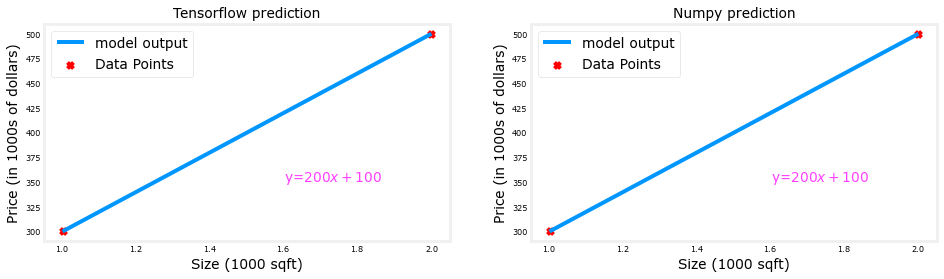

In [87]:
plt_linear(X_train, y_train, prediction_tf, prediction_np)

Neuron with Sigmoid activation
The function implemented by a neuron/unit with a sigmoid activation 
𝑓𝐰,𝑏(𝑥(𝑖))=𝑔(𝐰𝑥(𝑖)+𝑏)(2)
where
𝑔(𝑥)=𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑥)
 

Let's set  𝑤
  and  𝑏
  to some known values and check the model

In [90]:
X_train = np.array([0,1,2,3,4,5], dtype=np.float32).reshape(-1,1)  #2-D matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

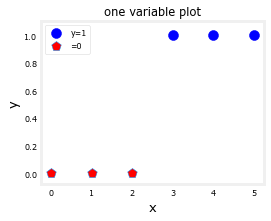

In [117]:
pos = Y_train == 1
neg = Y_train ==0

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.scatter (X_train[pos], Y_train[pos], marker='o',s=100, c='b', label='y=1')
ax.scatter(X_train[neg], Y_train[neg],s=100, marker='p', c='r', label='=0',edgecolors=dlc["dlblue"])
ax.set_ylim(-0.08,1.1)
ax.set_ylabel('y', fontsize=13)
ax.set_xlabel('x', fontsize=13)
ax.set_title('one variable plot')
ax.legend()
plt.show()

Logistic Neuron¶
We can implement a 'logistic neuron' by adding a sigmoid activation. will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

In [135]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

In [136]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [138]:
logistic_layer = model.get_layer('L1')
w,b = model.get_weights()
print(w,b)
print(w.shape, b.shape)

[[-0.27]] [0.]
(1, 1) (1,)


In [144]:
set_w = np.array([[10]])
set_b = np.array([-5.2])

logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights)

<bound method Layer.get_weights of <keras.layers.core.dense.Dense object at 0x0000029426412F10>>


In [148]:
a_1 = model.predict(X_train[0].reshape(1,1))
print(a_1)

alog = sigmoidnp(np.dot(set_w, X_train[0].reshape(1,1))+ set_b)
print(alog)

1/1 [==============================] - 0s 14ms/step
[[0.01]]
[[0.01]]


Now, we can use our logistic layer and NumPy model to make predictions on our training data.

1/1 [==============================] - 0s 8ms/step


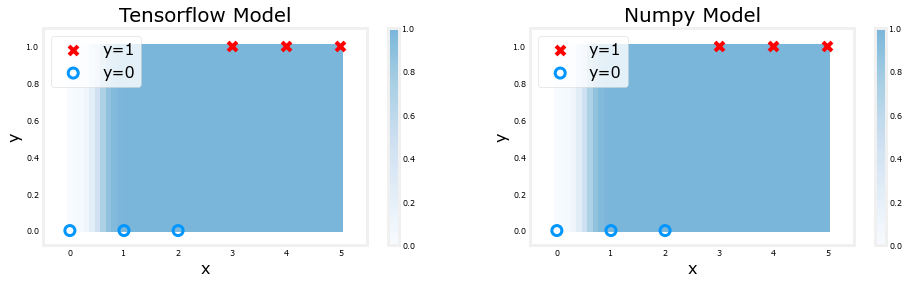

In [147]:
plt_logistic(X_train,Y_train, model, set_w, set_b,pos, neg)